In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap

In [4]:
dataset = pd.read_csv("/content/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
X = dataset[["texture_mean", "radius_mean"]]
y = dataset["diagnosis"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Explicitly cast xx and yy to float
    xx = xx.astype(float)
    yy = yy.astype(float)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Convert predicted labels to numeric
    Z_numeric = np.where(Z == 'M', 1, 0)
    Z_numeric = Z_numeric.reshape(xx.shape)


    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_numeric, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k')
    plt.title(title)
    plt.xlabel("texture_mean")
    plt.ylabel("radius_mean")
    plt.show()

Linear SVM Accuracy: 0.9005847953216374
              precision    recall  f1-score   support

           B       0.90      0.95      0.92       108
           M       0.91      0.81      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



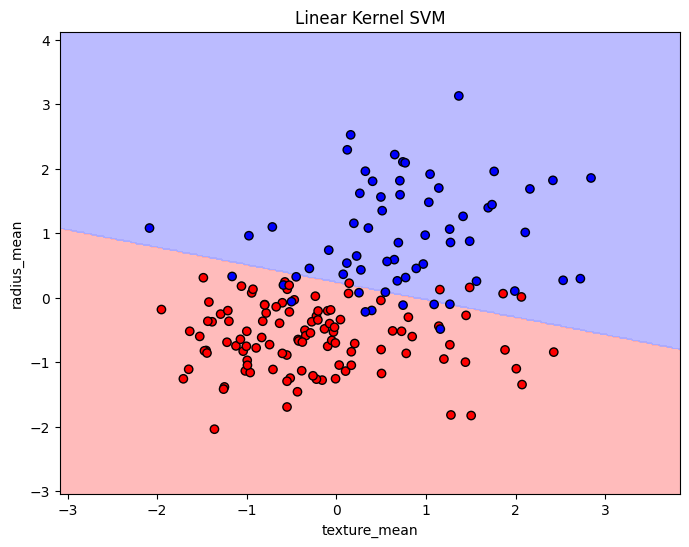

In [34]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# Convert y_test to numeric for plotting
y_test_numeric = np.where(y_test == 'M', 1, 0)

plot_decision_boundary(X_test, y_test_numeric, svm_linear, "Linear Kernel SVM")

RBF Kernel SVM Accuracy: 0.9064327485380117
              precision    recall  f1-score   support

           B       0.90      0.95      0.93       108
           M       0.91      0.83      0.87        63

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



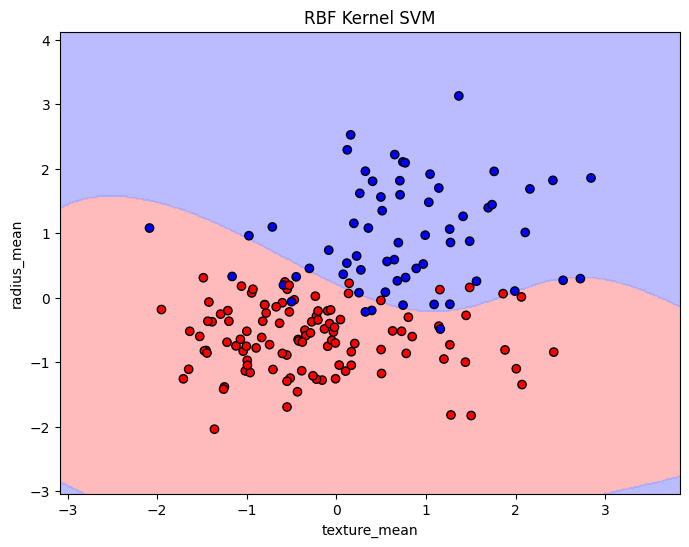

In [35]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Convert y_test to numeric for plotting
y_test_numeric = np.where(y_test == 'M', 1, 0)

plot_decision_boundary(X_test.astype(float), y_test_numeric, svm_rbf, "RBF Kernel SVM")

In [36]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters from Grid Search: {'C': 1, 'gamma': 0.1}


Tuned SVM Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           B       0.91      0.95      0.93       108
           M       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



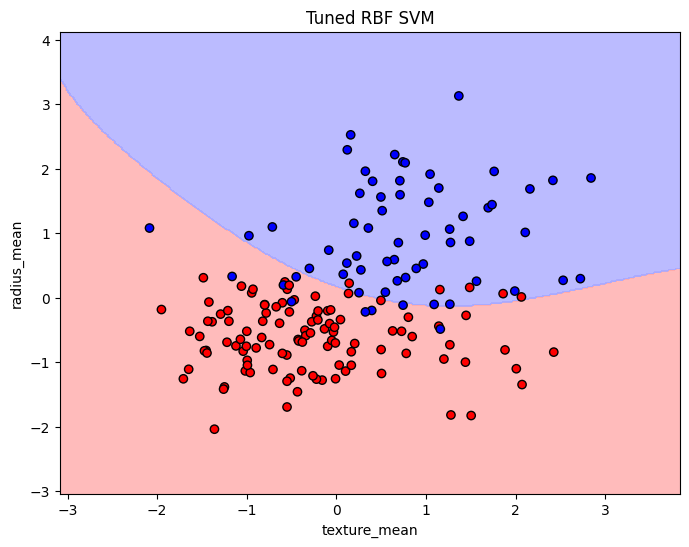

In [37]:
y_pred_best = best_model.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Convert y_test to numeric for plotting
y_test_numeric = np.where(y_test == 'M', 1, 0)

plot_decision_boundary(X_test, y_test_numeric, best_model, "Tuned RBF SVM")